In [1]:
# import dependencies
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# import data
crypto_df = pd.read_csv('Instructions/crypto_data.csv')

In [3]:
# verify data set
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
# get info
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1252 entries, 0 to 1251
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1252 non-null   object 
 1   CoinName         1252 non-null   object 
 2   Algorithm        1252 non-null   object 
 3   IsTrading        1252 non-null   bool   
 4   ProofType        1252 non-null   object 
 5   TotalCoinsMined  744 non-null    float64
 6   TotalCoinSupply  1252 non-null   object 
dtypes: bool(1), float64(1), object(5)
memory usage: 60.0+ KB


In [5]:
# get value counts
crypto_df['IsTrading'].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [6]:
# remove false IsTrading values
crypto_trading_df = crypto_df.loc[crypto_df['IsTrading'] == True]

In [7]:
# verify they are removed
crypto_trading_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [8]:
# remove null values
clean_crypto_trading_df = crypto_trading_df.dropna()
clean_crypto_trading_df.info()
#crypto_df = crypto_df.reset_index()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       685 non-null    object 
 1   CoinName         685 non-null    object 
 2   Algorithm        685 non-null    object 
 3   IsTrading        685 non-null    bool   
 4   ProofType        685 non-null    object 
 5   TotalCoinsMined  685 non-null    float64
 6   TotalCoinSupply  685 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 38.1+ KB


In [9]:
# filter for crypto that has been mined
clean_crypto_trading_df = clean_crypto_trading_df.loc[clean_crypto_trading_df['TotalCoinsMined'] > 0]
clean_crypto_trading_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   IsTrading        532 non-null    bool   
 4   ProofType        532 non-null    object 
 5   TotalCoinsMined  532 non-null    float64
 6   TotalCoinSupply  532 non-null    object 
dtypes: bool(1), float64(1), object(5)
memory usage: 29.6+ KB


In [10]:
# verify >0 values are filtered
clean_crypto_trading_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
...,...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [11]:
# remove unnecessary columns
clean_crypto_trading_df.drop(['Unnamed: 0', 'CoinName', 'IsTrading'], axis='columns', inplace=True)

In [12]:
# verify columns dropped
clean_crypto_trading_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [13]:
# get info on new df
clean_crypto_trading_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(3)
memory usage: 20.8+ KB


In [14]:
# explore algorithm
clean_crypto_trading_df['Algorithm'].value_counts()

Scrypt                    182
X11                        73
SHA-256                    48
CryptoNight                19
PoS                        17
                         ... 
1GB AES Pattern Search      1
QUAIT                       1
Proof-of-Authority          1
X11GOST                     1
TRC10                       1
Name: Algorithm, Length: 71, dtype: int64

In [15]:
# get value counts on new df
clean_crypto_trading_df['ProofType'].value_counts()

PoW                     237
PoW/PoS                 176
PoS                      86
DPoS                      9
PoC                       3
PoS/PoW                   2
Pos                       1
PoW + Hive                1
PoW/PoW                   1
Zero-Knowledge Proof      1
PoW/nPoS                  1
Proof of Trust            1
PoW and PoS               1
POBh                      1
PoST                      1
PoA                       1
dPoW/PoW                  1
PoS/LPoS                  1
PoS/PoW/PoT               1
Proof of Authority        1
PoW/PoS                   1
TPoS                      1
DPOS                      1
HPoW                      1
LPoS                      1
Name: ProofType, dtype: int64

In [16]:
# isolate TotalCoinSupply
clean_crypto_trading_df['TotalCoinSupply'].value_counts()

21000000       35
0              35
100000000      26
1000000000     18
500000000      11
               ..
22105263        1
86712634466     1
32514916898     1
616448          1
2500000000      1
Name: TotalCoinSupply, Length: 280, dtype: int64

In [17]:
# change TotalCoinsSupplied to numerical values
clean_crypto_trading_df['TotalCoinSupply'] = pd.to_numeric(clean_crypto_trading_df['TotalCoinSupply'], errors='coerce')
clean_crypto_trading_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Algorithm        532 non-null    object 
 1   ProofType        532 non-null    object 
 2   TotalCoinsMined  532 non-null    float64
 3   TotalCoinSupply  532 non-null    float64
dtypes: float64(2), object(2)
memory usage: 20.8+ KB


In [18]:
# convert all values to numerical
crypto_df = pd.get_dummies(clean_crypto_trading_df)
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 98 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TotalCoinsMined                   532 non-null    float64
 1   TotalCoinSupply                   532 non-null    float64
 2   Algorithm_1GB AES Pattern Search  532 non-null    uint8  
 3   Algorithm_536                     532 non-null    uint8  
 4   Algorithm_Argon2d                 532 non-null    uint8  
 5   Algorithm_BLAKE256                532 non-null    uint8  
 6   Algorithm_Blake                   532 non-null    uint8  
 7   Algorithm_Blake2S                 532 non-null    uint8  
 8   Algorithm_Blake2b                 532 non-null    uint8  
 9   Algorithm_C11                     532 non-null    uint8  
 10  Algorithm_Cloverhash              532 non-null    uint8  
 11  Algorithm_Counterparty            532 non-null    uint8  
 12  Algorit

In [19]:
# scale the data
scaler = StandardScaler()
data_scale = scaler.fit_transform(crypto_df)
data_scale[: 5]

array([[-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
        -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
        -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
        -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
        -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
        -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
        -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
        -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
        -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.39879994, -0.0433963 , -0.1

In [20]:
# check shape to verify clean data
print(crypto_df.shape)

(532, 98)


In [21]:
# apply pca
pca = PCA(n_components=0.90)
pca_d = pca.fit_transform(data_scale)

In [22]:
crypto_pca_df = pd.DataFrame(data=pca_d)

In [23]:
print(crypto_pca_df.shape)

(532, 74)


In [24]:
# apply tsne
tsne_setting = TSNE(learning_rate=35)
tsne_model = tsne_setting.fit_transform(crypto_pca_df)

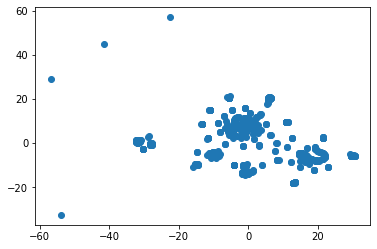

In [25]:
# create scatter plot for tsne
df_model = pd.DataFrame([])
df_model['x'] = tsne_model[:,0]
df_model['y'] = tsne_model[:,1]
plt.scatter(df_model['x'], df_model['y'])
plt.show()

C:\Users\joeln\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


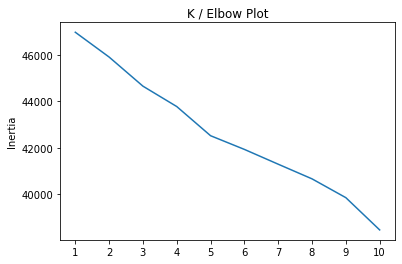

In [28]:
# elbow curve
inertia = []
k = list(range(1, 11))

# find K
for i in k:
    kem = KMeans(n_clusters=i, random_state=0)
    kem.fit(crypto_pca_df)
    inertia.append(kem.inertia_)

k_data = {"k": k, "inertia": inertia}
df_kmean = pd.DataFrame(k_data)

# elbow plot 
plt.plot(df_kmean['k'], df_kmean['inertia'])
plt.xticks(range(1,11))
plt.title('K / Elbow Plot')
plt.ylabel('Inertia')
plt.show()